In [1]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
#Choice = 1 if you have access to the data but not train/test data .txt files
#Choice = 0 if you have train/test data .txt files

choice = 0

#Number of data points to take per batch
no_points = 5000

Saving 3D Arrays:
https://www.geeksforgeeks.org/how-to-load-and-save-3d-numpy-array-to-file-using-savetxt-and-loadtxt-functions/

In [3]:
#Loops through all .csv files containing normal and imbalanced data, 
#takes first 5000 points from each, assigns label in separate array
if choice == 1:
    files_no = glob.glob('normal/*.csv')
    folders_im = glob.glob('imbalance/*')
    train_data = np.empty((382,no_points,8), float)
    test_data = np.empty((382,no_points,8), float)
    i=0
    for f_on in files_no:
        source_data = np.loadtxt(f_on, delimiter=",")
        train_data[i,:,:] = source_data[0:no_points,:]
        test_data[i,:,:] = source_data[no_points:no_points*2,:]
        i=i+1

    for folder in folders_im:
        files_im = glob.glob( folder +'/*.csv')
        for f_im in files_im:
            source_data = np.loadtxt(f_im, delimiter=",")
            train_data[i,:,:] = source_data[0:no_points//6,:]
            test_data[i,:,:] = source_data[no_points//6:no_points//6*2,:]
            i=i+1
    
    train_reshaped = np.reshape(train_data,(train_data.shape[0],-1))
    test_reshaped = np.reshape(test_data,(train_data.shape[0],-1))
    
    np.savetxt("train_data_equal.txt", train_reshaped)
    np.savetxt("test_data_equal.txt", test_reshaped)
    
    train_label = np.zeros(49)
    train_label = np.append(train_label, np.ones(333), axis=0)
    test_label = np.zeros(49)
    test_label = np.append(test_label, np.ones(333), axis=0)

    np.savetxt("train_label.txt", train_label)
    np.savetxt("test_label.txt", test_label)
    
    print("Finished parsing the files")

In [7]:
#Loads train/test data from .txt files to np arrays
if choice == 0:    
    train_reload = np.loadtxt("train_data.txt")
    test_reload = np.loadtxt("test_data.txt")

    train_label = np.loadtxt('train_label.txt').astype(int)
    test_label = np.loadtxt('test_label.txt').astype(int)
    
    print(train_label.shape)
    print("Loaded data files...")

(382,)
Loaded data files...


In [8]:
train_data = np.reshape(train_reload,(train_reload.shape[0],train_reload.shape[1]//8, 8))
test_data = np.reshape(test_reload,(test_reload.shape[0],test_reload.shape[1]//8, 8))

In [9]:
#Splits the batch of 5000 into ten batches of 500
train_data = train_data.reshape(train_data.shape[0]*10,int(no_points/10),8, 1)
test_data = test_data.reshape(test_data.shape[0]*10, int(no_points/10), 8, 1)
train_label = np.zeros(490)
train_label = np.append(train_label, np.ones(3330), axis=0)
test_label = np.zeros(490)
test_label = np.append(test_label, np.ones(3330), axis=0)

# #Change label arrays to categorical
# train_label = np_utils.to_categorical(train_label)
# test_label = np_utils.to_categorical(test_label)

In [10]:
#Load prediction data
pred_load = np.loadtxt("pred_data.txt")
pred_data = np.reshape(pred_load,(pred_load.shape[0],pred_load.shape[1]//8, 8, 1))
pred_label = np.loadtxt("pred_label.txt")
# pred_label = np_utils.to_categorical(pred_label)

In [11]:
#Build the model
model = Sequential()
model.add(Conv2D(30, (3, 3), input_shape=(500, 8, 1), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 6, 30)        300       
_________________________________________________________________
dropout (Dropout)            (None, 498, 6, 30)        0         
_________________________________________________________________
flatten (Flatten)            (None, 89640)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               11474048  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3

In [12]:
history =  model.fit(train_data, train_label, validation_data=(test_data, test_label), epochs=10, batch_size=32)

Epoch 1/10
120/120 [==============================] - 24s 16ms/step - loss: 0.4051 - accuracy: 0.9198 - val_loss: 0.1253 - val_accuracy: 0.9497
Epoch 2/10
120/120 [==============================] - 1s 10ms/step - loss: 0.0924 - accuracy: 0.9666 - val_loss: 0.0589 - val_accuracy: 0.9772
Epoch 3/10
120/120 [==============================] - 1s 10ms/step - loss: 0.0531 - accuracy: 0.9800 - val_loss: 0.0711 - val_accuracy: 0.9733
Epoch 4/10
120/120 [==============================] - 1s 10ms/step - loss: 0.0484 - accuracy: 0.9797 - val_loss: 0.0473 - val_accuracy: 0.9840
Epoch 5/10
120/120 [==============================] - 1s 10ms/step - loss: 0.0253 - accuracy: 0.9915 - val_loss: 0.0664 - val_accuracy: 0.9780
Epoch 6/10
120/120 [==============================] - 1s 10ms/step - loss: 0.0267 - accuracy: 0.9877 - val_loss: 0.0494 - val_accuracy: 0.9819
Epoch 7/10
120/120 [==============================] - 1s 10ms/step - loss: 0.0238 - accuracy: 0.9921 - val_loss: 0.0896 - val_accuracy: 0.973

In [10]:
test_accuracy = model.evaluate(test_data, test_label)

120/120 [==============================] - 0s 4ms/step - loss: 0.0722 - accuracy: 0.9757


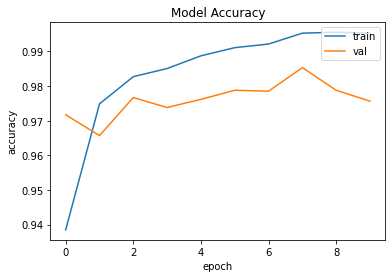

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [12]:
model.evaluate(pred_data, pred_label)

120/120 [==============================] - 0s 3ms/step - loss: 0.1093 - accuracy: 0.9749


[0.10925935208797455, 0.9748691320419312]

In [13]:
model.save("amir_CNN")

INFO:tensorflow:Assets written to: amir_CNN\assets


In [14]:
# print(pred_data.shape)
# print(pred_label.shape)
prediction = model.predict_classes(pred_data)
prediction = prediction.reshape(prediction.shape[0])
print(prediction.shape)
print(1-sum(prediction != pred_label)/3820)

C:\Users\Amir\anaconda3\envs\tf-gpu-new\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(3820,)
0.974869109947644


In [15]:
files_no = glob.glob('normal/*.csv')
# errors = numpy.empty(1)
for f_on in files_no:
    normal_data = np.loadtxt(f_on, delimiter=",")
    normal_data = normal_data.reshape(-1,500,8,1)
    y = model.predict_classes(normal_data)
    print(f_on, sum(y)/y.shape[0])

normal\12.288.csv [0.112]
normal\13.1072.csv [0.174]
normal\14.336.csv [0.146]
normal\15.1552.csv [0.168]
normal\16.1792.csv [0.14]
normal\17.2032.csv [0.4]
normal\18.432.csv [0.314]
normal\19.6608.csv [0.122]
normal\20.2752.csv [0.114]
normal\21.7088.csv [0.112]
normal\22.3232.csv [0.102]
normal\23.552.csv [0.114]
normal\24.576.csv [0.068]
normal\25.6.csv [0.054]
normal\26.624.csv [0.1]
normal\27.4432.csv [0.106]
normal\28.8768.csv [0.022]
normal\29.4912.csv [0.074]
normal\30.72.csv [0.048]
normal\31.744.csv [0.006]
normal\32.9728.csv [0.002]
normal\33.5872.csv [0.004]
normal\34.2016.csv [0.012]
normal\35.4304.csv [0.002]
normal\36.4544.csv [0.002]
normal\37.6832.csv [0.]
normal\38.2976.csv [0.002]
normal\39.3216.csv [0.018]
normal\40.3456.csv [0.056]
normal\41.7792.csv [0.]
normal\42.3936.csv [0.002]
normal\43.6224.csv [0.006]
normal\44.6464.csv [0.]
normal\45.4656.csv [0.006]
normal\46.2848.csv [0.]
normal\47.7184.csv [0.]
normal\48.9472.csv [0.]
normal\49.5616.csv [0.058]
normal\51